In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,export_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# from google.colab import files
# uploaded=files.upload()

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/play_tennis.csv')
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
le=LabelEncoder()
data['outlook_n']=le.fit_transform(data['outlook'])
data['temp_n']=le.fit_transform(data['temp'])
data['humidity_n']=le.fit_transform(data['humidity'])
data['windy_n']=le.fit_transform(data['wind'])
data['play_n']=le.fit_transform(data['play'])
data

,day,outlook,temp,humidity,wind,play,outlook_n,temp_n,humidity_n,windy_n,play_n
0,D1,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,D2,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,D3,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,D4,Rain,Mild,High,Weak,Yes,1,2,0,1,1
4,D5,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1
5,D6,Rain,Cool,Normal,Strong,No,1,0,1,0,0
6,D7,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,D8,Sunny,Mild,High,Weak,No,2,2,0,1,0
8,D9,Sunny,Cool,Normal,Weak,Yes,2,0,1,1,1
9,D10,Rain,Mild,Normal,Weak,Yes,1,2,1,1,1


In [ ]:
data.drop(['outlook','temp','humidity','wind','play'],axis=1)

,day,outlook_n,temp_n,humidity_n,windy_n,play_n
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [ ]:
independent_var=data.drop(['play_n','day','outlook','temp','humidity','wind','play'],axis='columns')
dependent_var=data['play_n']

In [ ]:
independent_var

,outlook_n,temp_n,humidity_n,windy_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [ ]:
dependent_var

,play_n
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(independent_var,dependent_var,test_size=0.3,random_state=42)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 60.00%


In [ ]:
new_data=[[2,1,0,1]]

In [ ]:
prediction=model.predict(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Prediction:(0=No,1=Yes)",prediction[0])


Prediction:(0=No,1=Yes) 0


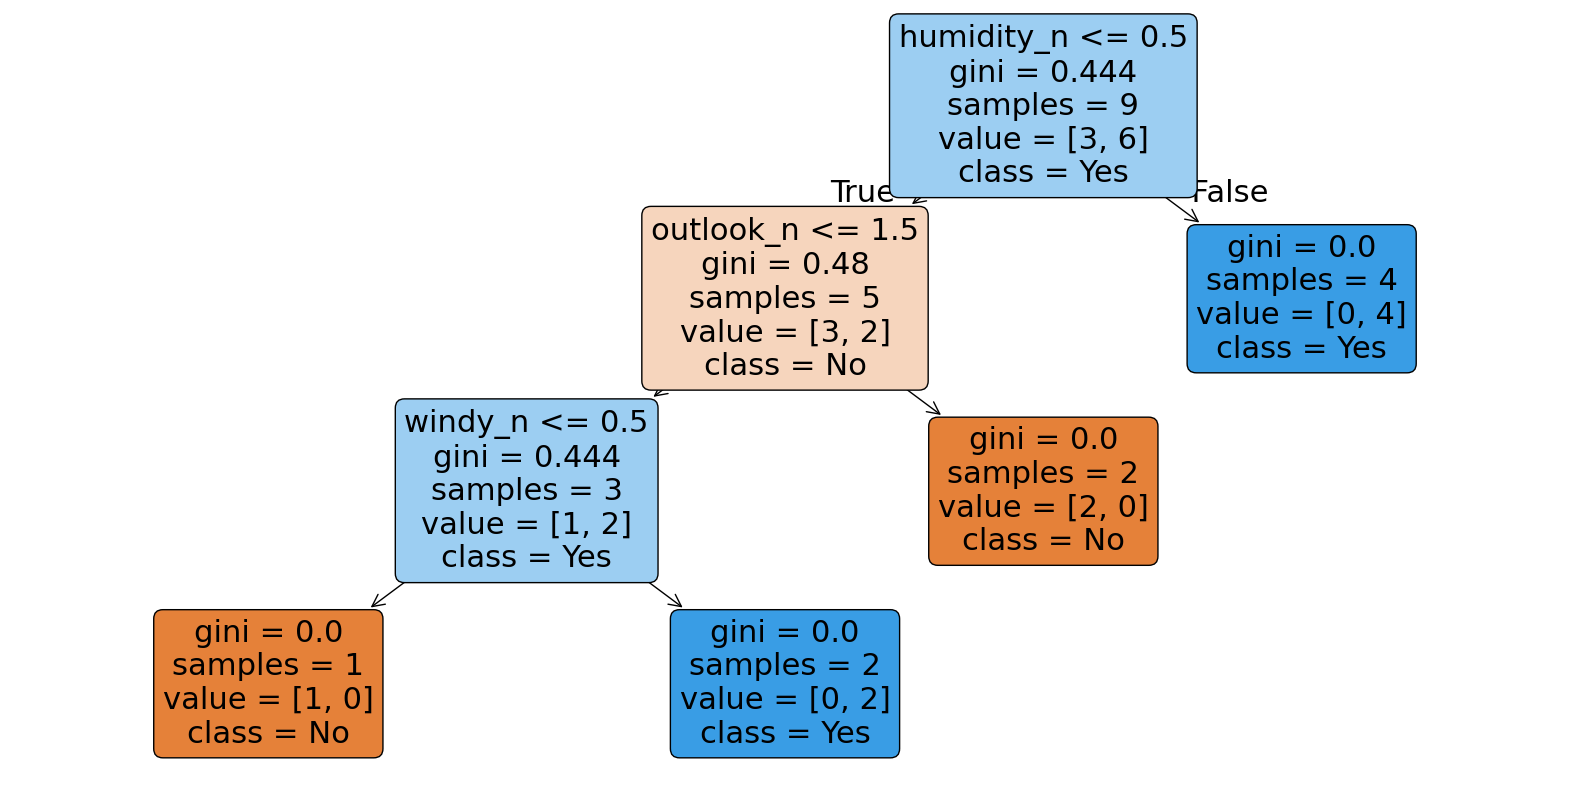

In [ ]:
# Display Tree Rules(Text-Based)

feature_names=['outlook_n','temp_n','humidity_n','windy_n']
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,
                feature_names=feature_names,
                class_names=['No','Yes'],
                filled=True,
                rounded=True)
plt.show()

